# Jake the Unreliable Human

Jake The Unreliable Human doesn’t tell the truth 3/4 of the time.

Jake The Unreliable Human rolls a fair six sided die that only Jake The Unreliable Human can see and tells you the value on the die. If Jake The
Unreliable Human chooses to not tell the truth, Jake The Unreliable Human will always pick 6 - unless Jake The Unreliable Human rolls a 6, in which
case Jake The Unreliable Human will pick a different number with uniform probability.

Given that Jake The Unreliable Human tells you that he has a 6, what is the probability that Jake The Unreliable Human actually has a 6?

When calculating your answer, you do not need to consider the probability of typical human errors such as misreading the numbers on the die or being
distracted by a doughnut vendor and dropping the die through a drain cover.

Please give your answer in the form a/b where a and b are integers and the fraction a/b is in its most simplified form.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy.stats import uniform
%matplotlib inline

In [2]:
def generate_ensemble(throws):
    ensemble = randint.rvs(1, 7, size=throws)
    return ensemble

In [3]:
ensemble = generate_ensemble(1000000)

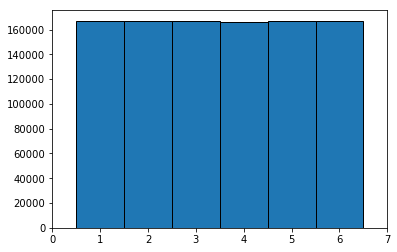

In [4]:
f,a = plt.subplots();
a.hist(ensemble, bins=6, range=(0.5,6.5), align='mid', edgecolor='k');
a.set_xlim(0, 7);

In [5]:
def truth_or_lie():
    r = uniform.rvs(size=1)
    if r < 0.75:
        return False
    if r >= 0.75:
        return True

In [6]:
def truth_or_lie_vec(n):
    return [truth_or_lie() for i in range(n)]

In [7]:
isTrue = truth_or_lie_vec(10000)

(array([ 7489.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2511.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

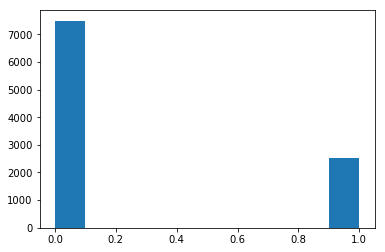

In [8]:
f,a = plt.subplots()
a.hist(isTrue)

In [9]:
def jakesays(dice_val):
    tellTruth = truth_or_lie()
    if tellTruth:
        return dice_val
    else:
        if dice_val < 5.5:
            return 6
        else:
            return randint.rvs(1, 6, size=1)

In [10]:
jakesays_vec = np.vectorize(jakesays)

In [11]:
jake = jakesays_vec(ensemble)

In [12]:
throws_and_jake = [i for i in zip(ensemble,jake)]

In [13]:
ncount_jake_six = 0
ncount_jake_six_and_true = 0
for throw, jake in throws_and_jake:
    if jake == 6:
        ncount_jake_six += 1
        if throw == 6:
            ncount_jake_six_and_true += 1
print(ncount_jake_six)
print(ncount_jake_six_and_true)
print(ncount_jake_six_and_true/ncount_jake_six)

666809
41681
0.06250815450901233


Precise answer should be 1/16:

In [14]:
1.0/16

0.0625